In [1]:
import os
os.environ["PYTHONPATH"] = ""
os.environ["PATH"] = "/opt/app-root/src/for_snudda/bin:" + os.environ["PATH"]

In [2]:
cd "/opt/app-root/src/drive/Shared with groups/BasalGanglia-Reproducible/Snudda"

/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda


## Simulate the network

Set up striatal network of 100 neurons. This writes the configuration file `network-config.json` (see the last line of the output). Option `--overwrite` allows to overwrite the network's directory if it exists.

In [3]:
!snudda init networks/net_1000 --size 1000 --overwrite

Creating config file
Network path: networks/net_1000
Creating missing directory networks/net_1000
Created directory networks/net_1000
CreateConfig
Using 1 functional channels
Adding Striatum with 1000 neurons
Using cube for striatum
Creating cube mesh
File: networks/net_1000/mesh/Striatum-cube-mesh-0.00023159794767993228.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00023159794767993228
Description: Striatum cube mesh, centre = [0.00354  0.004645 0.005081], side = 0.00023159794767993228
Adding neurons: FSN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/fs
Adding neurons: dSPN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/dspn
Adding neurons: iSPN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/ispn
Adding neurons: ChIN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/c

Place the neurons based on the network config file. Positions are written to the file `network-neuron-positions.hdf5`.

In [4]:
!snudda place networks/net_1000

Placing neurons
Network path: networks/net_1000
Creating missing directory networks/net_1000/log
Created directory networks/net_1000/log
Using runID = 5
Using hdf5 version: latest
Parsing configuration file networks/net_1000/network-config.json
Using meshBinWidth 4.6319589535986456e-05
Cube mesh, switching to serial processing.
No mesh cache file found (networks/net_1000/mesh/Striatum-cube-mesh-0.00023159794767993228.obj-46-cache.pickle)
Running in serial
Voxel mask: 9x9x10
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Processing x = 5
Processing x = 6
Processing x = 7
Processing x = 8
Fraction of border voxels: 0.0
Saving mesh cache file networks/net_1000/mesh/Striatum-cube-mesh-0.00023159794767993228.obj-46-cache.pickle
Calculation time: 0.08385847136378288 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 3 FSN_0
No cache f

Detect the apposition points where axons and dendrites of different neurons overlap.  
*-- this took about 50 minutes*

In [5]:
!snudda detect networks/net_1000

Touch detection
Network path: networks/net_1000
Creating missing directory networks/net_1000/voxels
Created directory networks/net_1000/voxels
Using runID = 6
Already have a log file setup, ignoring
Using hdf5 driver version: latest
{'total': 32779652, 'free': 24834988, 'used': 7944664}
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Loading from networks/net_1000/network-config.json
Reading prototype for: FSN_0
Found cache file: /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20190226/MTC180800A-IDB-cor-rep-cache.pickle
Reading prototype for: FSN_1
Found cache file: /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/fs/str-fs-e161205_FS1-mMTC180800A-IDB-v20190312/MTC180800A-IDB-cor-rep-cache.pickle
Reading prototype for: FSN_2
Found cache file: /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/f

Prune the detected appositions to get the set of synapses.

In [6]:
!snudda prune networks/net_1000

Prune synapses
Network path: networks/net_1000
Using runID = 7
preMergeOnly : False
Setting random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/net_1000/log/network-detect-worklog.hdf5
Using default scratch path: networks/net_1000//temp/
Checking for merge file networks/net_1000//network-putative-synapses-MERGED.hdf5
Running merge in serial
Doing bigMerge (lookup) for synapses
[0, 521, 1048576, 0.75]
(0, 521, 20971520, 0.75)
Opening voxel file: networks/net_1000//voxels/network-putative-synapses-31.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/net_1000//voxels/network-putative-synapses-32.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/net_1000//voxels/network-putative-synapses-36.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/net_1000//voxels/network-putative-synapses-56.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/net_1000//voxels/network-putative-synapses-6.hdf5
[0, 521, 20971520, 0.75]
Openin

Generate external input events for the network. A 1 second duration of the simulation is reserved.

In [7]:
!snudda input networks/net_1000 --input snudda/data/config/input-tinytest-v6.json --time 1.0

Setting up inputs, assuming input.json exists
Using runID = 8
Writing input spikes to networks/net_1000/input-spikes.hdf5
Time = 1.0
Setting random seed: None
Using hdf5 version latest
Loading HDF5-file: networks/net_1000/network-pruned-synapses.hdf5
Loading input configuration from snudda/data/config/input-tinytest-v6.json
Reading neuron postions
Loading networks/net_1000/network-neuron-positions.hdf5
No SlurmID set, using -1
Load done. 0.019839109852910042
Reading config file networks/net_1000/network-config.json
IPYTHON_PROFILE = None
No IPYTHON_PROFILE enviroment variable set, running in serial
Running makeChannelSpikeTrains
Running makeNeuronInputParallell
Clearing channelSpikesList, thus all neurons will have their own mother process for each input
Running input generation in serial
Found cache file: /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Gener

### Compile MOD files
*not necessary - requirementes are already met by following the instructions.txt*

In [1]:
#!nrnivmodl snudda/data/cellspecs-v2/mechanisms

### Run the simulation

Option `--time` defines duration of the simulation, in seconds. It can't be longer than the duration of the external input reserved above. Try 100 milliseconds for a very short simulation. -> *if we are increasing simulation time, increase input time as well*

*-- this took about 3 hours*

In [3]:
!snudda simulate networks/net_1000/ --time 0.1 --input networks/net_1000/input-spikes.hdf5 --voltOut networks/net_1000/simulation/volt.txt

--No graphics will be displayed.
Using input file networks/net_1000/input-spikes.hdf5
args: Namespace(action='simulate', cont=False, disableConnection=None, disableGJ=False, h5legacy=False, hvsize=None, input='networks/net_1000/input-spikes.hdf5', inputFile=None, mechDir=None, mergeonly=False, nchannels=1, networkFile=None, overwrite=False, path='networks/net_1000', profile=False, recordGapJunctions=None, recordPointProcess=None, size=None, spikesOut=None, time=0.1, verbose=False, voltOut='networks/net_1000/simulation/volt.txt', volumeID=None)
Using networkFile: networks/net_1000/network-pruned-synapses.hdf5
Using inputFile: networks/net_1000/input-spikes.hdf5
Using logFile: networks/net_1000/log/network-simulation-log.txt
I am node 0
Worker 0: Loading network from networks/net_1000/network-pruned-synapses.hdf5
Loading networks/net_1000/network-pruned-synapses.hdf5
Loading config data from HDF5
999 neurons with 313665 synapses and 90 gap junctions
Load done. 0.7828744010184892
Loading 

## Plot simulation results

In [4]:
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-x6rl8r5u because the default path (/home/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


See the spike raster plot for all cell types.

Loading networks/net_1000/network-pruned-synapses.hdf5
Loading config data from HDF5
999 neurons with 313665 synapses and 90 gap junctions
Load done. 0.29695057100616395
Sort the traces
Sort the traces


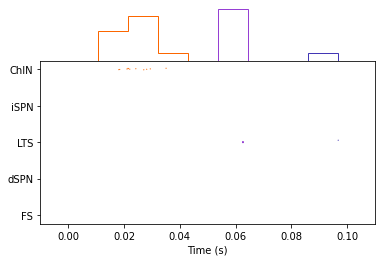

<Figure size 432x288 with 0 Axes>

Saving networks/net_1000/figs/network-output-spikes-666-colour.png


<Figure size 432x288 with 0 Axes>

In [5]:
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/net_1000/simulation/network-output-spikes-666.txt"
networkFile = "networks/net_1000/network-pruned-synapses.hdf5"
endTime = 0.1
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

Check voltage traces for randomly the selected cells.

Unable to guess ID, using 666.
Loading networks/net_1000/network-pruned-synapses.hdf5
Loading config data from HDF5
999 neurons with 313665 synapses and 90 gap junctions
Load done. 0.21630390401696786
!!! Excluding first 0s from the plot
Plotting traces: [0, 2, 5, 6, 9]
Plotted 5 traces (total 999)


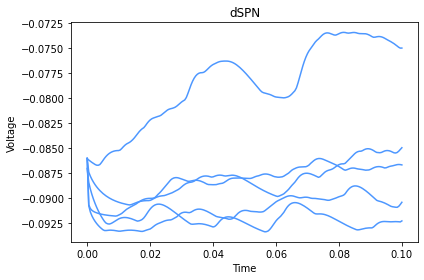

<Figure size 432x288 with 0 Axes>

Saving to figure networks/net_1000/figs/Network-spikes-666-dSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [1, 3, 4, 7, 8]
Plotted 5 traces (total 999)


<Figure size 432x288 with 0 Axes>

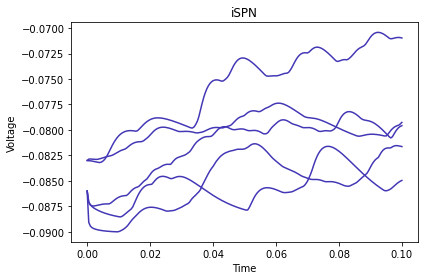

<Figure size 432x288 with 0 Axes>

Saving to figure networks/net_1000/figs/Network-spikes-666-iSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [84, 130, 172, 318, 361]
Plotted 5 traces (total 999)


<Figure size 432x288 with 0 Axes>

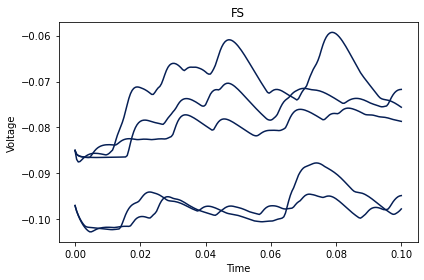

<Figure size 432x288 with 0 Axes>

Saving to figure networks/net_1000/figs/Network-spikes-666-FSN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [141, 271, 336, 564, 668]
Plotted 5 traces (total 999)


<Figure size 432x288 with 0 Axes>

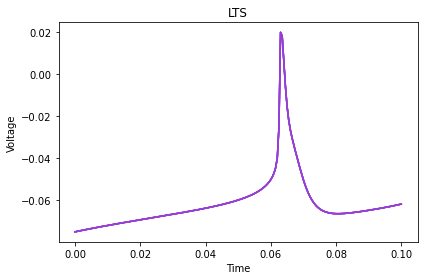

<Figure size 432x288 with 0 Axes>

Saving to figure networks/net_1000/figs/Network-spikes-666-LTS-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [83, 234, 353, 387, 388]
Plotted 5 traces (total 999)


<Figure size 432x288 with 0 Axes>

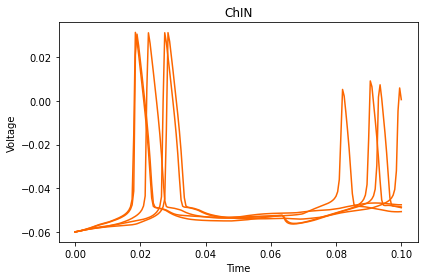

<Figure size 432x288 with 0 Axes>

Saving to figure networks/net_1000/figs/Network-spikes-666-ChIN-colour.png


<Figure size 432x288 with 0 Axes>

In [6]:
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

plotOffset = 0
skipTime = 0
nTracesMax = 5

fileName = "networks/net_1000/simulation/volt.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/net_1000/network-pruned-synapses.hdf5"
    
npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)


Analyze spatial distribution of the synapses for each cell type.

Loading networks/net_1000/network-pruned-synapses.hdf5
Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading networks/net_1000/network-pruned-synapses.hdf5
Loading config data from HDF5
999 neurons with 313665 synapses and 90 gap junctions
Load done. 0.08885343797737733
Number of neurons: 999
Synapse row 0 - 0.0 % time: 0.06169512600172311 seconds
Created connection matrix 0.8132230849587359 seconds
GJ row : 0 - 0.0 %  time : 0.006051936012227088 seconds
Created gap junction connection matrix 0.006975337979383767 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
nSynapses = 313665, at 0
Created distance histogram (optimised) in 1.0504251550300978 seconds
Saving cache to networks/net_1000/network-pruned-synapses.hdf5-cache
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 484/484
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [119133.]
Rejected (too large z-depth): 115123
P(d<5e-05)=0.06491246032558616
P(d<0.0001)=0.051917540782899306


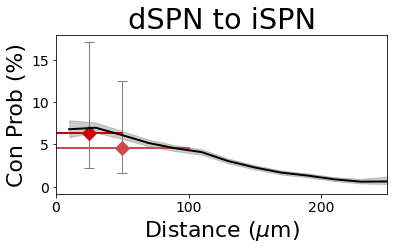

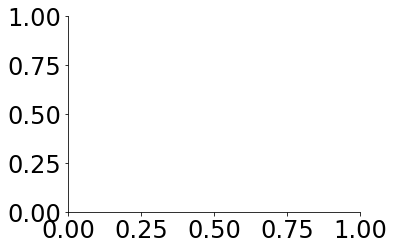

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 484/484
Counting connections
Requested: 10000000.0 calculated [117046.]
Rejected (too large z-depth): 116726
P(d<5e-05)=0.2756357670221493
P(d<0.0001)=0.2159749438917362


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


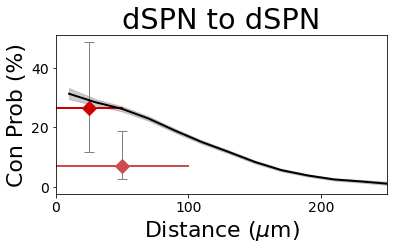

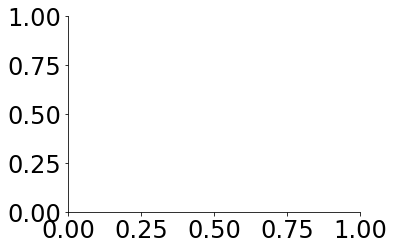

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 484/484
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [119133.]
Rejected (too large z-depth): 115123
P(d<5e-05)=0.2642571925872837
P(d<0.0001)=0.20525462426789318


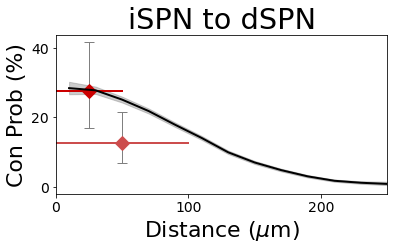

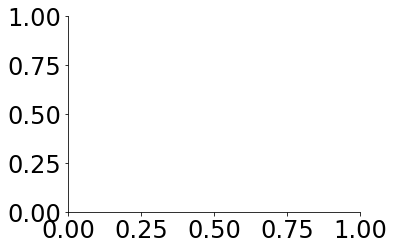

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 484/484
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [121254.]
Rejected (too large z-depth): 112518
P(d<5e-05)=0.32532858978159895
P(d<0.0001)=0.2758098996875514


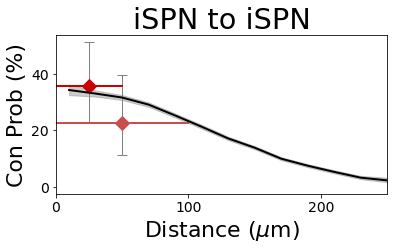

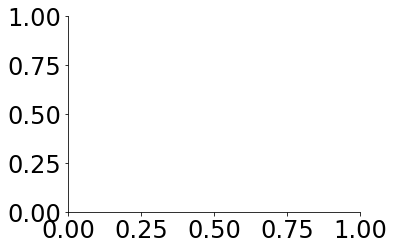

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to iSPN (synapses)
Centering in None : Keeping 484/484
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [3422.]
Rejected (too large z-depth): 2870
P(d<0.0001)=0.5182012847965739
P(d<0.00015)=0.4238310708898944
P(d<0.00025)=0.3471853816681403


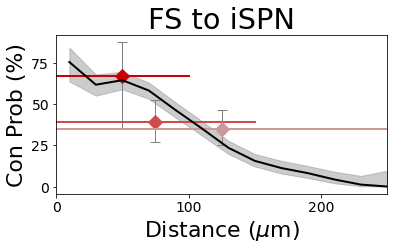

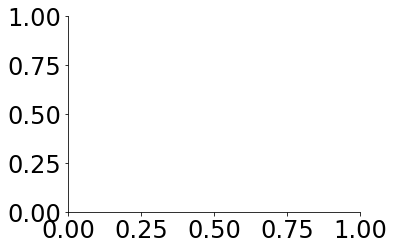

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-FSN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to dSPN (synapses)
Centering in None : Keeping 484/484
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [3398.]
Rejected (too large z-depth): 2894
P(d<0.0001)=0.7185821697099892
P(d<0.00015)=0.6072657743785851
P(d<0.00025)=0.4943653618030842


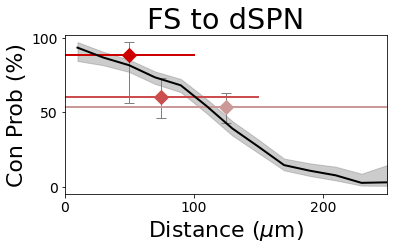

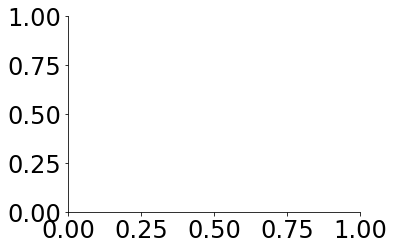

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (synapses)
Centering in None : Keeping 13/13
Counting connections
Requested: 10000000.0 calculated [110.]
Rejected (too large z-depth): 46
P(d<0.00025)=0.3055555555555556


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


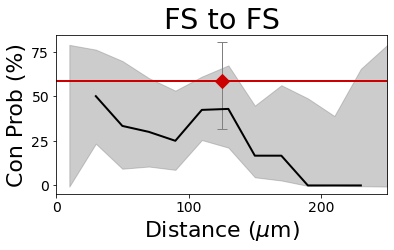

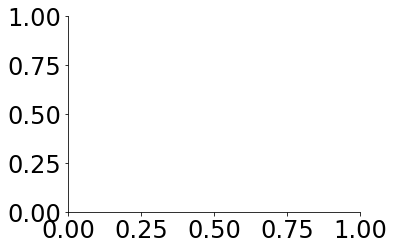

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (gapjunctions)
Centering in None : Keeping 13/13
Counting connections
Requested: 10000000.0 calculated [110.]
Rejected (too large z-depth): 46
P(d<0.00025)=0.1574074074074074
P(d<0.00025)=0.1574074074074074


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


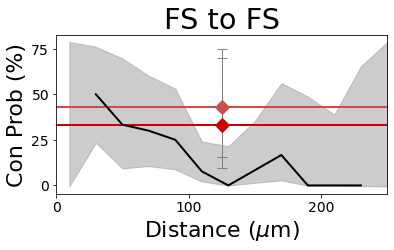

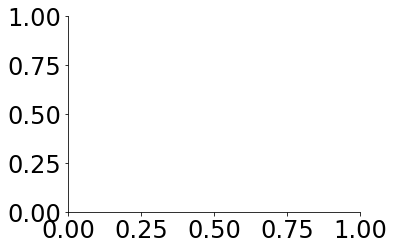

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
Plotting connection probability LTS to dSPN (synapses)
Centering in None : Keeping 484/484
Counting connections
Requested: 10000000.0 calculated [1800.]
Rejected (too large z-depth): 1588
P(d<0.00025)=0.0940649496080627


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


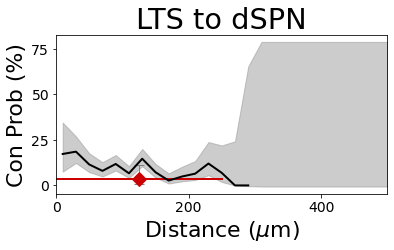

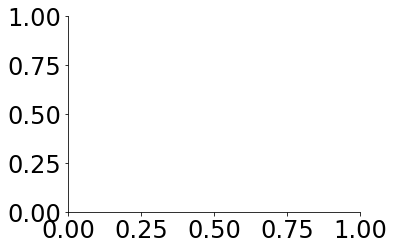

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to iSPN (synapses)
Centering in None : Keeping 484/484
Counting connections
Requested: 10000000.0 calculated [1856.]
Rejected (too large z-depth): 1532
P(d<0.00025)=0.08641304347826087


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


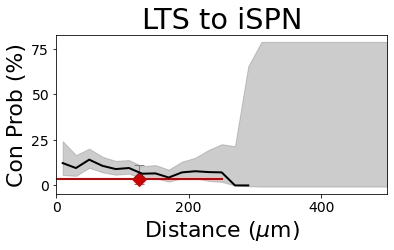

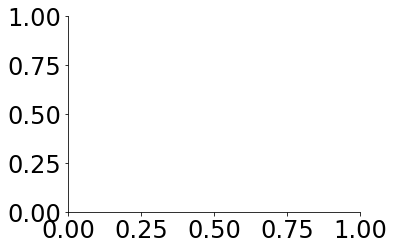

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to LTS (synapses)
Centering in None : Keeping 7/7
Counting connections
Requested: 10000000.0 calculated [52.]
Rejected (too large z-depth): 39
P(d<0.00025)=0.0392156862745098


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


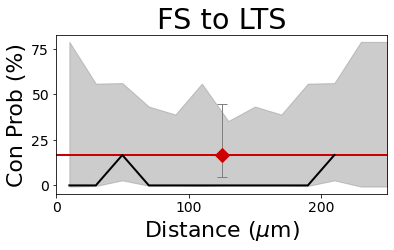

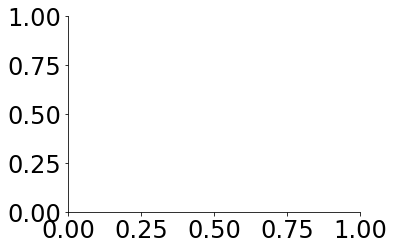

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-FSN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to LTS (synapses)
Centering in None : Keeping 7/7
Counting connections
Requested: 10000000.0 calculated [40.]
Rejected (too large z-depth): 37


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


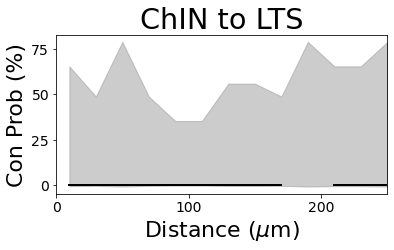

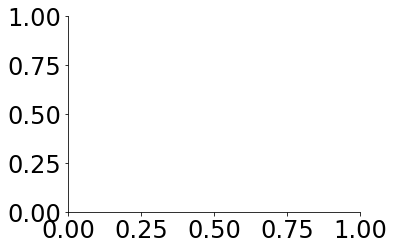

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to iSPN (synapses)
Centering in None : Keeping 484/484
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2659.]
Rejected (too large z-depth): 2665
P(d<0.00025)=0.0


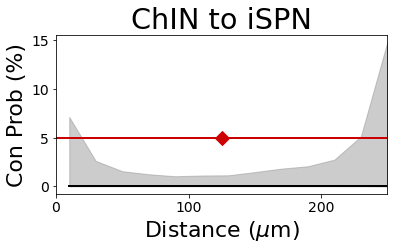

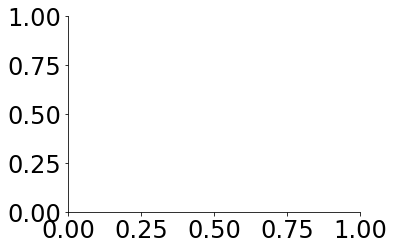

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability ChIN to dSPN (synapses)
Centering in None : Keeping 484/484
Counting connections
Requested: 10000000.0 calculated [2633.]
Rejected (too large z-depth): 2691
P(d<0.00025)=0.0


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


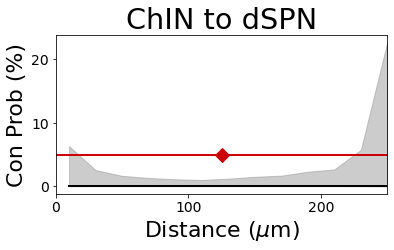

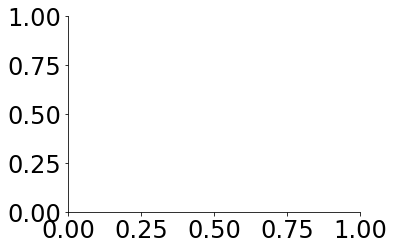

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to ChIN (synapses)
Centering in None : Keeping 11/11
Counting connections
Requested: 10000000.0 calculated [40.]
Rejected (too large z-depth): 37


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


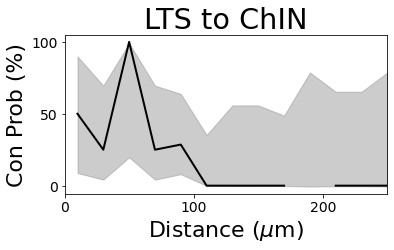

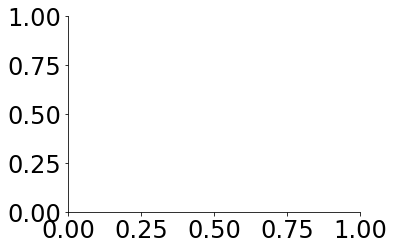

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-LTS-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability ChIN to FSN (synapses)
Centering in None : Keeping 13/13
Counting connections
Requested: 10000000.0 calculated [85.]
Rejected (too large z-depth): 58


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


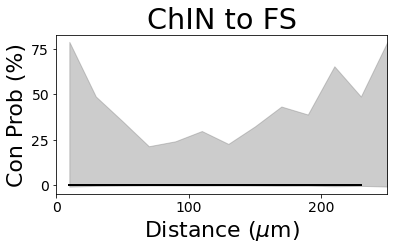

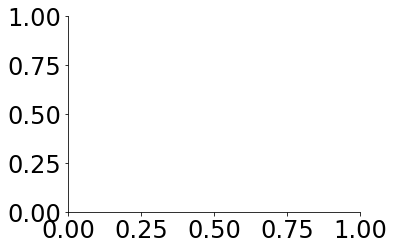

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability dSPN to ChIN (synapses)
Centering in None : Keeping 11/11
Counting connections
Requested: 10000000.0 calculated [2633.]
Rejected (too large z-depth): 2691


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


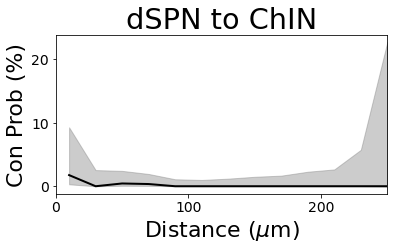

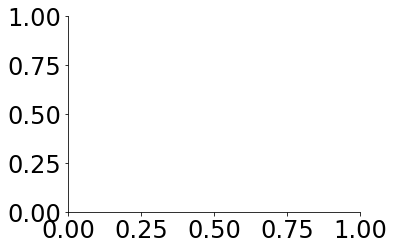

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability iSPN to ChIN (synapses)
Centering in None : Keeping 11/11
Counting connections
Requested: 10000000.0 calculated [2659.]
Rejected (too large z-depth): 2665


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


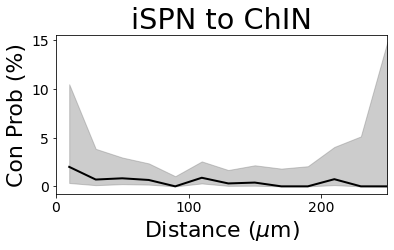

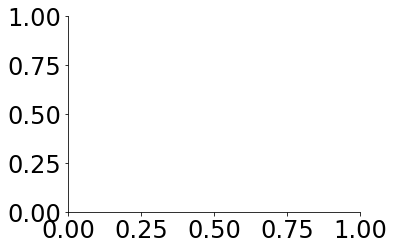

Wrote networks/net_1000/figures/Network-distance-dependent-connection-probability-iSPN-to-ChIN-synapses-2D-dist.pdf


In [7]:
  from snudda.analyse_striatum import SnuddaAnalyseStriatum
  nas = SnuddaAnalyseStriatum("networks/net_1000",volumeType="cube")
    
  plotHenrike = True
  plotChIN = True
  plotLTS = True

  dist3D = False
  #dist3D = True


  if(plotHenrike):

    yMaxH = None #0.5

    nas.plotConnectionProbability("dSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[3/47.0,3/66.0],
                                  expDataDetailed=[(3,47),(3,66)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("dSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[5/19.0,3/43.0],
                                  expDataDetailed=[(5,19),(3,43)],
                                  yMax=yMaxH)    
    nas.plotConnectionProbability("iSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[13/47.0,10/80.0],
                                  expDataDetailed=[(13,47),(10,80)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("iSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[14/39.0,7/31.0],
                                  expDataDetailed=[(14,39),(7,31)],
                                  yMax=yMaxH)


  if(True):

    nas.plotConnectionProbability("FSN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[6/9.0, 21/54.0, 27/77.0],
                                  expDataDetailed=[(6,9),(21,54),(27,77)],
                                  yMax=None)

    nas.plotConnectionProbability("FSN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[8/9.0, 29/48.0, 48/90.0],
                                  expDataDetailed=[(8,9),(29,48),(48,90)],
                                  yMax=None)

    
    #  Gittis,...,Kreitzer 2010 (p2228) -- 7/12 (and 3/4 reciprocal) -- distance?
    # FS->FS synapses weaker, 1.1 +/- 1.5nS  
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[250e-6],\
                                  expData=[7/12.0],
                                  expDataDetailed=[(7,12)] )
    
    # Koos & Tepper 1999, 2/6
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D ,
                                  connectionType="gapjunctions",
                                  expMaxDist=[250e-6,250e-6],
                                  expData=[2/6.0,3/7.0],
                                  expDataDetailed=[(2,6),(3,7)],)



  if(plotLTS):

    # 3/21 LTS->MS, Basal Ganglia book --- distance??
    # Ibanez-Sandoval, ..., Tepper  2011 3/21 -- if patching around visual axon
    # but 2/60 when patching blind
    nas.plotConnectionProbability("LTS","dSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

    nas.plotConnectionProbability("LTS","iSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

  
    # Silberberg et al 2013, 2/12 FS-> LTS connected --- distance??
    nas.plotConnectionProbability("FSN","LTS", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2.0/12],
                                  expDataDetailed=[(2,12)])

  nas.plotConnectionProbability("ChIN","LTS", \
                                dist3D=dist3D)
  
  # Janicova 2015?? --- distance??!
  nas.plotConnectionProbability("ChIN","iSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
    
  nas.plotConnectionProbability("ChIN","dSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
  
  if(True):
    nas.plotConnectionProbability("LTS","ChIN", \
                                  dist3D=dist3D )

  if(plotChIN):    
    nas.plotConnectionProbability("ChIN","FSN", \
                                  dist3D=dist3D,
                                  yMax=None)

    nas.plotConnectionProbability("dSPN","ChIN", \
                                  dist3D=dist3D)
    nas.plotConnectionProbability("iSPN","ChIN", \
                                  dist3D=dist3D)



Simulation analysis plots are saved as PDF files in the directory `networks/net_1000/figures`.

In [8]:
!ls networks/net_1000/figures/*.pdf

networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
networks/net_1000/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
networks/ne

## Closing remarks

This example creates a very small striatal network. Size of the network and other parameters can be adjusted. For more information, please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide.

Questions and suggestions related to *Snudda* simulations, please address to the main developer, *Johannes Hjorth* [hjorth@kth.se](mailto:hjorth@kth.se).